# Linear Regression UBIG

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation

Data Nan:
 Hours     0
Scores    6
dtype: int64
Data Kosong:
 Hours     0
Scores    6
dtype: int64
Tipe Data:
 Hours     float64
Scores    float64
dtype: object
Jumlah Baris: 98
Jumlah data: 2


<Axes: xlabel='Scores', ylabel='Count'>

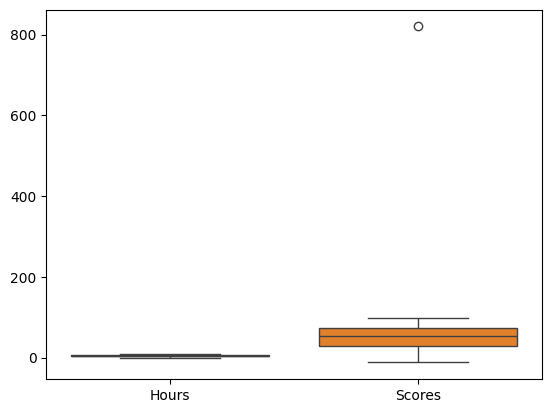

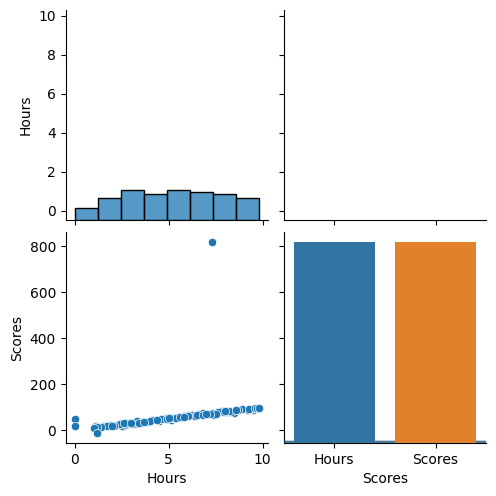

In [3]:
dataset = pd.read_csv(r'E:\pythonjupyter\datasets\score_updated.csv')
dataset

print("Data Nan:\n",dataset.isna().sum())
print("Data Kosong:\n",dataset.isnull().sum())
print("Tipe Data:\n",dataset.dtypes)
rows,columns = dataset.shape
print("Jumlah Baris:",rows)
print("Jumlah data:",columns)
sns.boxplot(dataset)
sns.pairplot(dataset)
sns.countplot(dataset)

<Axes: >

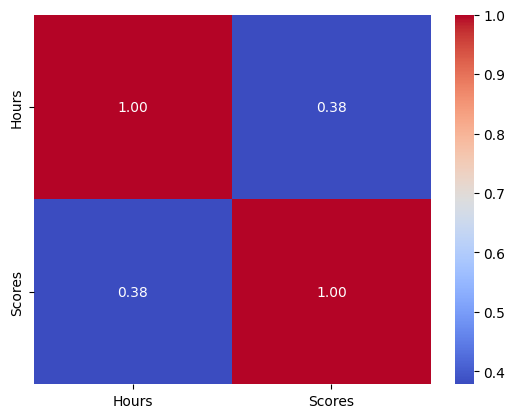

In [4]:
sns.heatmap(data=dataset.corr(),annot=True,cmap="coolwarm",fmt='.2f')

# Prepocessing

In [5]:
dataset['Scores'].fillna(dataset['Scores'].mean(),inplace=True)
print(dataset.isna().sum())

Hours     0
Scores    0
dtype: int64


C:\Users\Ivriel Gunawan\AppData\Local\Temp\ipykernel_21352\525561916.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Scores'].fillna(dataset['Scores'].mean(),inplace=True)


# Modelling

In [6]:

x=dataset['Hours']
y=dataset['Scores']

# Acak dataset
np.random.seed(42)
shuffled_index = np.random.permutation(len(dataset))

#Membagi data
train_size = int(0.8*len(dataset))
train_indices = shuffled_index[:train_size]
test_indices = shuffled_index[train_size:]

x_train,x_test = x.iloc[train_indices],x.iloc[test_indices]
y_train,y_test = y.iloc[train_indices],y.iloc[test_indices]

#Cari Slope
atas=(( x_train-x_train.mean())* (y_train-y_train.mean())).sum() #Numerator
bawah = ((x_train-x_train.mean())**2).sum() #Denomirator
slope= atas/bawah

#Intercept
intercept = y_train.mean() - slope*x_train.mean()

y_pred = intercept + slope*x_test
print("Slope:",slope)
print("Intercept:",intercept)
print("Prediksi:\n",y_pred.round())

# Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred)**2)

# R-squared (R^2)
ss_total = ((y_test - y_test.mean())**2).sum()  # Total sum of squares
ss_residual = ((y_test - y_pred)**2).sum()  # Residual sum of squares
r_squared = 1 - (ss_residual / ss_total)

print("MSE:",mse.round())
print("R Square:",r_squared.round())



Slope: 11.627968009635328
Intercept: 1.8161485670670814
Prediksi:
 63    26.0
91    69.0
37    75.0
29    56.0
1     61.0
52    79.0
21    58.0
2     39.0
23    82.0
87    25.0
89    83.0
74    36.0
86    81.0
82    13.0
20    33.0
60    90.0
71    77.0
14    15.0
92    53.0
51    94.0
Name: Hours, dtype: float64
MSE: 104.0
R Square: 1.0


In [8]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.round()})
print(results)

       Actual  Predicted
63  20.000000       26.0
91  60.000000       69.0
37  66.000000       75.0
29  50.000000       56.0
1   47.000000       61.0
52  72.000000       79.0
21  54.000000       58.0
2   27.000000       39.0
23  60.336957       82.0
87  18.000000       25.0
89  73.000000       83.0
74  31.000000       36.0
86  67.000000       81.0
82  12.000000       13.0
20  30.000000       33.0
60  78.000000       90.0
71  65.000000       77.0
14  17.000000       15.0
92  44.000000       53.0
51  80.000000       94.0


# Visualisasi

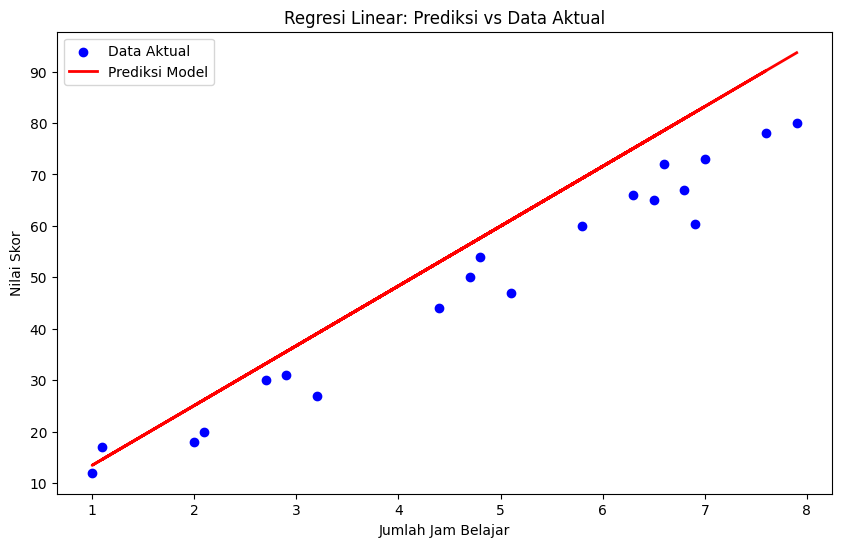

In [9]:


# Visualisasi data asli dan hasil prediksi
plt.figure(figsize=(10, 6))

# Plot data aktual
plt.scatter(x_test, y_test, color='blue', label='Data Aktual')

# Plot prediksi
plt.plot(x_test, y_pred, color='red', label='Prediksi Model', linewidth=2)

# Menambahkan label dan judul
plt.title('Regresi Linear: Prediksi vs Data Aktual')
plt.xlabel('Jumlah Jam Belajar')
plt.ylabel('Nilai Skor')
plt.legend()

# Menampilkan plot
plt.show()
